### Introduction 

SafeTravel Inc. is one of the world's largest insurance companies specializing in travel insurance. During travel, there are a lot of risk factors - loss of baggage, airline cancellations, health issues etc. The potential customers are travellers who want to insure themselves against travel-related risks. They have different product offerings like 1-way travel insurance, 2-way insurance, insurance against cancellations and so on. They receive thousands of claims spread across different products.

Wrongly denying a genuine claim could lead to lawsuits against the company and approving the wrong claim would lead to a loss. Automatically predicting the claims could lead to a lot of benefits and solve some other supplementary problems too. As a team of data scientists consulting for SafeTravel Inc, you are now responsible for meeting their business outcomes.

### 1. Problem Statement

Insurance companies take risks over customers. Risk management is a very important aspect of the insurance industry. Insurers consider every quantifiable factor to develop profiles of high and low insurance risks. Insurers collect vast amounts of information about policyholders and analyze the data.

As a Data scientist in an insurance company, you need to analyze the available data and predict whether to sanction the insurance or not.

### 2. Import Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro, normaltest
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
#from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report
import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE

In C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [4]:
data=pd.read_csv('C:/Users/DELL/Downloads/Travel Insurance Project/data/train.csv')
data_test=pd.read_csv('C:/Users//DELL/Downloads/Travel Insurance Project/data/test.csv')

data.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,3433,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,7,MALAYSIA,0.0,17.82,NaN,31
1,4339,EPX,Travel Agency,Online,Cancellation Plan,0,85,SINGAPORE,69.0,0.00,NaN,36
2,34590,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,11,MALAYSIA,19.8,11.88,NaN,75
3,55816,EPX,Travel Agency,Online,2 way Comprehensive Plan,0,16,INDONESIA,20.0,0.00,NaN,32
4,13816,EPX,Travel Agency,Online,Cancellation Plan,0,10,"KOREA, REPUBLIC OF",15.0,0.00,NaN,29


### Feature Information

#### Target: Claim Status : (0 - The insurance is not sanctioned, 1- The insurance is sanctioned)

ID: Unique Id

Agency: Name of agency

Agency Type: Type of travel insurance agencies

Distribution Channel: Distribution channel of travel insurance agencies

Product Name: Name of the travel insurance products

Duration: Duration of travel

Destination: Destination of travel

Net Sales: Amount of sales of travel insurance policies

Commission: Commission received for travel insurance agency

Gender: Gender of insured

Age: Age of insured

### 3. Dataset Information

In [5]:
print("This dataframe {} rows and {} columns".format(data.shape[0],data.shape[1]))

This dataframe 50660 rows and 12 columns


In [254]:
data.describe(include="all")

,ID,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
count,50660.000000,50660,50660,50660,50660,50660.000000,50660.000000,50660,50660.000000,50660.000000,14614,50660.000000
unique,NaN,16,2,2,26,NaN,NaN,144,NaN,NaN,2,NaN
top,NaN,EPX,Travel Agency,Online,Cancellation Plan,NaN,NaN,SINGAPORE,NaN,NaN,M,NaN
freq,NaN,28082,36672,49770,14926,NaN,NaN,10608,NaN,NaN,7537,NaN
mean,31674.458014,NaN,NaN,NaN,NaN,0.014647,49.413383,NaN,40.837350,9.834257,NaN,40.008231
std,18289.180100,NaN,NaN,NaN,NaN,0.120135,101.354774,NaN,48.884947,19.904720,NaN,14.074357
min,0.000000,NaN,NaN,NaN,NaN,0.000000,-2.000000,NaN,-389.000000,0.000000,NaN,0.000000
25%,15883.750000,NaN,NaN,NaN,NaN,0.000000,9.000000,NaN,18.000000,0.000000,NaN,35.000000
50%,31646.500000,NaN,NaN,NaN,NaN,0.000000,22.000000,NaN,27.000000,0.000000,NaN,36.000000
75%,47543.250000,NaN,NaN,NaN,NaN,0.000000,53.000000,NaN,48.500000,11.550000,NaN,44.000000


In [255]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50660 entries, 0 to 50659
Data columns (total 12 columns):
ID                      50660 non-null int64
Agency                  50660 non-null object
Agency Type             50660 non-null object
Distribution Channel    50660 non-null object
Product Name            50660 non-null object
Claim                   50660 non-null int64
Duration                50660 non-null int64
Destination             50660 non-null object
Net Sales               50660 non-null float64
Commision (in value)    50660 non-null float64
Gender                  14614 non-null object
Age                     50660 non-null int64
dtypes: float64(2), int64(4), object(6)
memory usage: 4.6+ MB


### When we look at the above description and info we can see that

Duration: contains ‘-2’

Gender : Too many NaN

Age: Max age of 118.

Net Sale: contains '-389'

In [256]:
#Concat the two datasets
data_full = pd.concat([data, data_test])
data_full.shape

(63326, 12)

### 4. EDA

#### Data Visualization

In [257]:
cols = data.columns
num_cols = data._get_numeric_data().columns
print (num_cols)
cat_cols=list(set(cols) - set(num_cols))
print(cat_cols)

Index(['ID', 'Claim', 'Duration', 'Net Sales', 'Commision (in value)', 'Age'], dtype='object')
['Distribution Channel', 'Agency', 'Gender', 'Destination', 'Product Name', 'Agency Type']


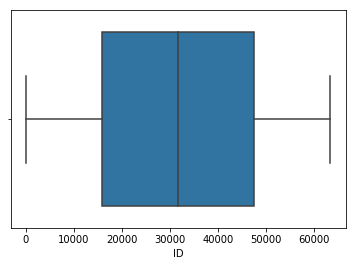

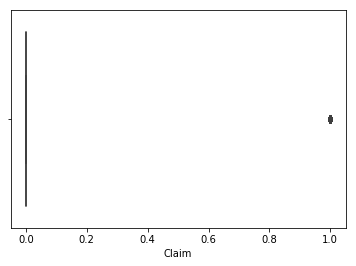

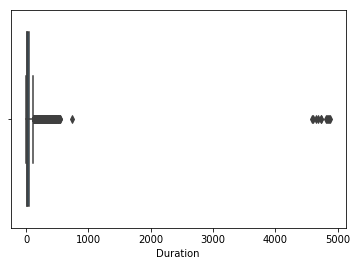

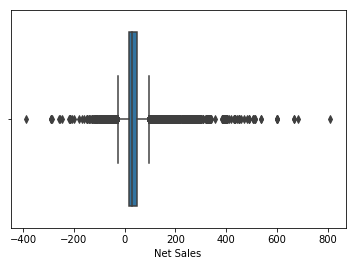

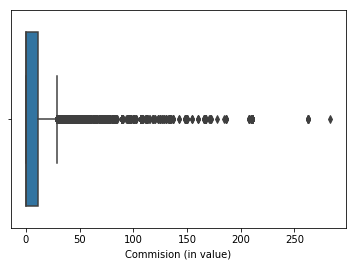

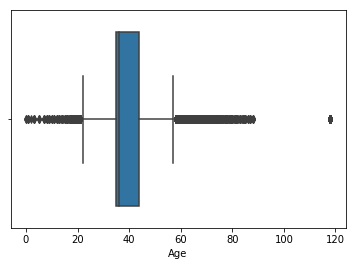

In [258]:
# Boxplot for numerical column
for c in num_cols:
    plt.figure()
    sns.boxplot(x=data[c])

####### Observation: From above we can see that therea are some outliers we treat them in data preprocessing stage

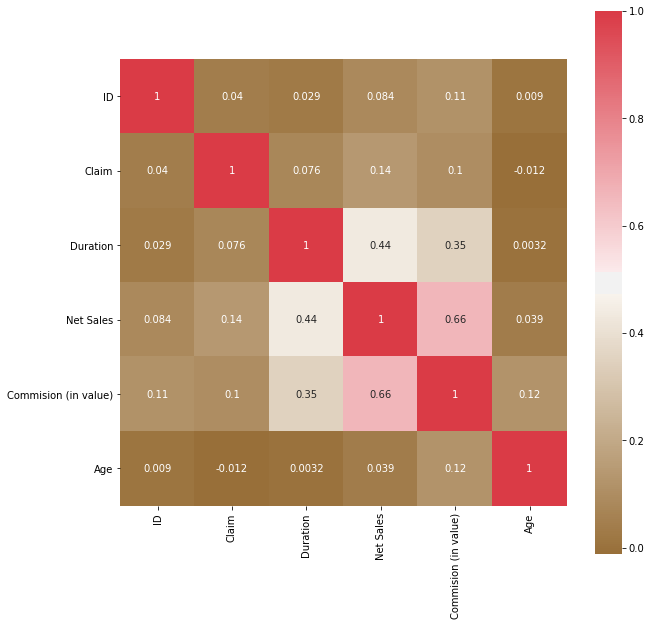

In [260]:
# Chack the correaltion between columns

f, ax = plt.subplots(figsize = (10, 10))
corr = data.corr()
sns.heatmap(corr,annot = True, mask = np.zeros_like(corr, dtype = np.bool),
           cmap = sns.diverging_palette(50, 10, as_cmap = True), square = True, ax = ax)

####### Observation: From above Heat Map we can see that there is very less corr between columns except "Commission" and "Net Sale" 
which is "0.66" but this we can treat as independeant

In [261]:
# Normality plots for numerical columns

def normality_plots(df, col):
    """
    normality plots
    """
    fig = plt.figure(figsize=(15, 5))
    shapiro_p = round(shapiro(df[col])[1], 2)
    normaltest_p = round(normaltest(df[col])[1], 2)
    plt.subplot(1, 3, 1)
    plt.title('Histogram for '+col, color='navy', fontsize=12)
    plt.hist(df[col])
    plt.subplot(1, 3, 2)
    plt.title('Q-Q Plot for '+col, color='brown', fontsize=12)
    qqplot(df[col], line='s', ax=plt.subplot(1, 3, 2))
    plt.subplot(1, 3, 3)
    plt.title('Normality Test Results for '+col, color='olive', fontsize=12)
    plt.plot([shapiro_p, normaltest_p], linestyle=' ', marker='x')
    plt.text(x=0.2, y=0.5, s='Shapiro\np value\n'+str(shapiro_p))
    plt.text(x=0.6, y=0.5, s='Normaltest\np value\n'+str(normaltest_p))
    plt.ylim((0, 1))
    plt.hlines(y=0.05, color='r', xmin=0, xmax=1)

    fig.text(x=0.5, y=1.07, s=f'Normality test for {col}', fontsize=16, weight='bold', ha='center', va = 'bottom', color='navy')

    if all(st>0.05 for st in [shapiro_p, normaltest_p]):
        fig.text(x=0.5, y=1.03, s=f'Distrubution is Gaussion', fontsize=14, ha='center', va = 'bottom', color='darkblue')
    else:
        fig.text(x=0.5, y=1.03, s=f'Distrubution is skewed', fontsize=14, ha='center', va = 'bottom', color='darkblue')
    
    plt.show()

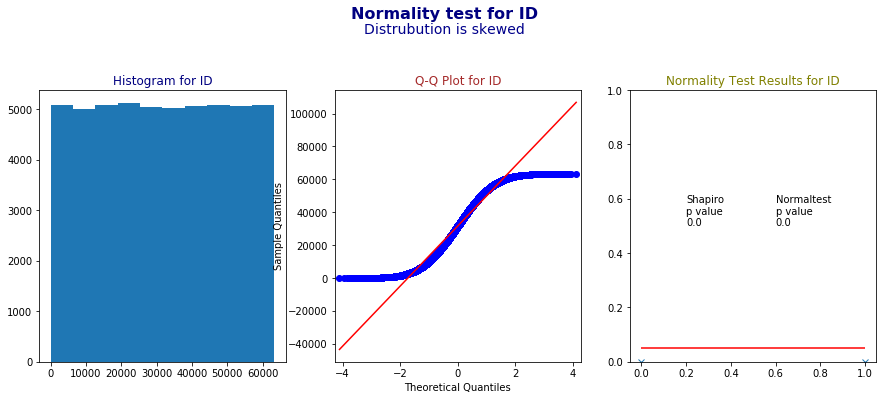

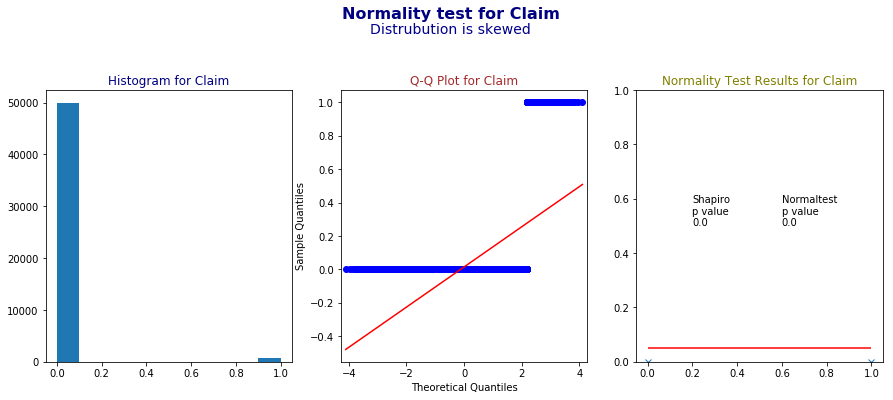

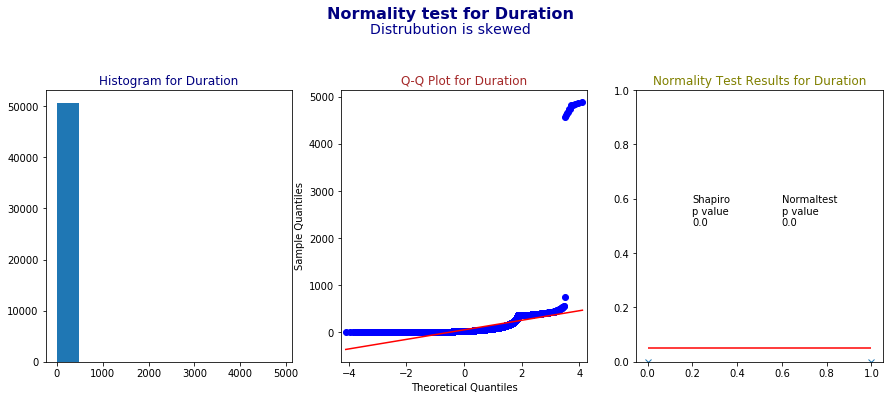

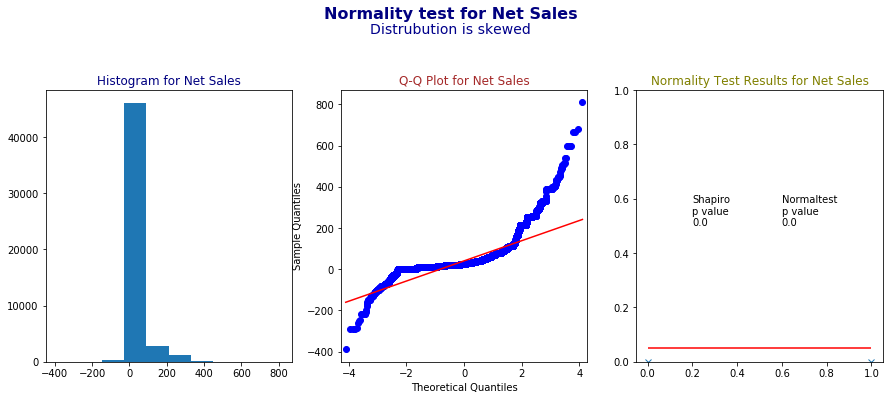

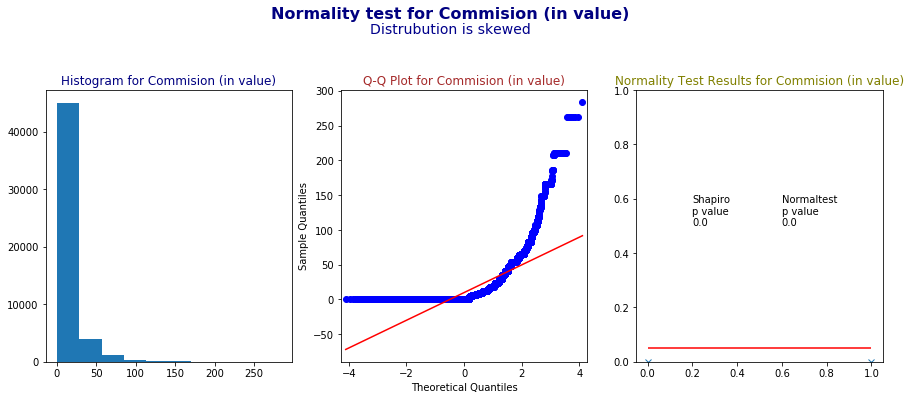

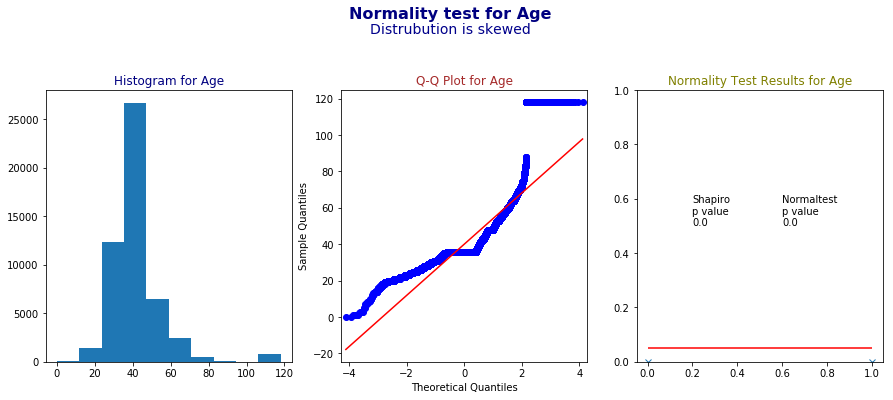

In [112]:
for col in num_cols:
    normality_plots(data, col)

#Observation: Fron above Normality test we can see that 
1. Histograms and the skewness values: It can be seen that all of the continuous variables are skewed to the right.
2. QQ- Plot: This is not Normal Distribution
3. p-value: Null hypothesis is failed to reject

In [262]:
def get_class_counts(df, target, display='all', subtitle=None):
    """
    Plots a countplot of column.

    display are number percent or all

    """

    fig = plt.figure(figsize=(7,7))
    g = sns.countplot(df[target])
    for p in g.patches:
        if display == 'all':
            g.annotate('{}\n\n{:.2f} %\n'.format(p.get_height(),100*p.get_height()/len(df)),(p.get_x(),p.get_height()+10),bbox=dict(boxstyle="round",alpha=0.1,color='grey'))
        elif display == 'number':
            g.annotate('{}'.format(p.get_height()),(p.get_x(),p.get_height()+10),bbox=dict(boxstyle="round",alpha=0.1,color='grey'))
        elif display == 'percent':
            g.annotate('{:.2f}'.format(100*p.get_height()/len(df)),(p.get_x(),p.get_height()+10),bbox=dict(boxstyle="round",alpha=0.1,color='grey'))
        else:
            raise ValueError('dispay must be either if number, percent or all')

    g.set_ylim(0, max([p.get_height()*1.15 for p in g.patches]))
    g.text(x=0.5, y=1.07, s=f'count plot of {target}', fontsize=16, weight='bold', ha='center', va='bottom', transform = g.transAxes, color='navy')

    if subtitle:
        g.text(x=0.5, y=0.5, s=f'{subtitle}', fontsize=12, alpha=0.75, ha='center', va='bottom', transform = g.transAxes, color='darkblue')
    if any([p.get_height()/len(df) < 0.2 for p in g.patches]):
        fig.text(x=1, y=0.5, s=f'Imblance exists in data', bbox=dict(boxstyle='round', color='red', alpha=0.7), color='white', fontsize=14)
    else:
        fig.text(x=1, y=0.5, s=f'Balace dataset', bbox=dict(boxstyle='round', color='green', alpha=0.7), color='white', fontsize=14)

    plt.show()

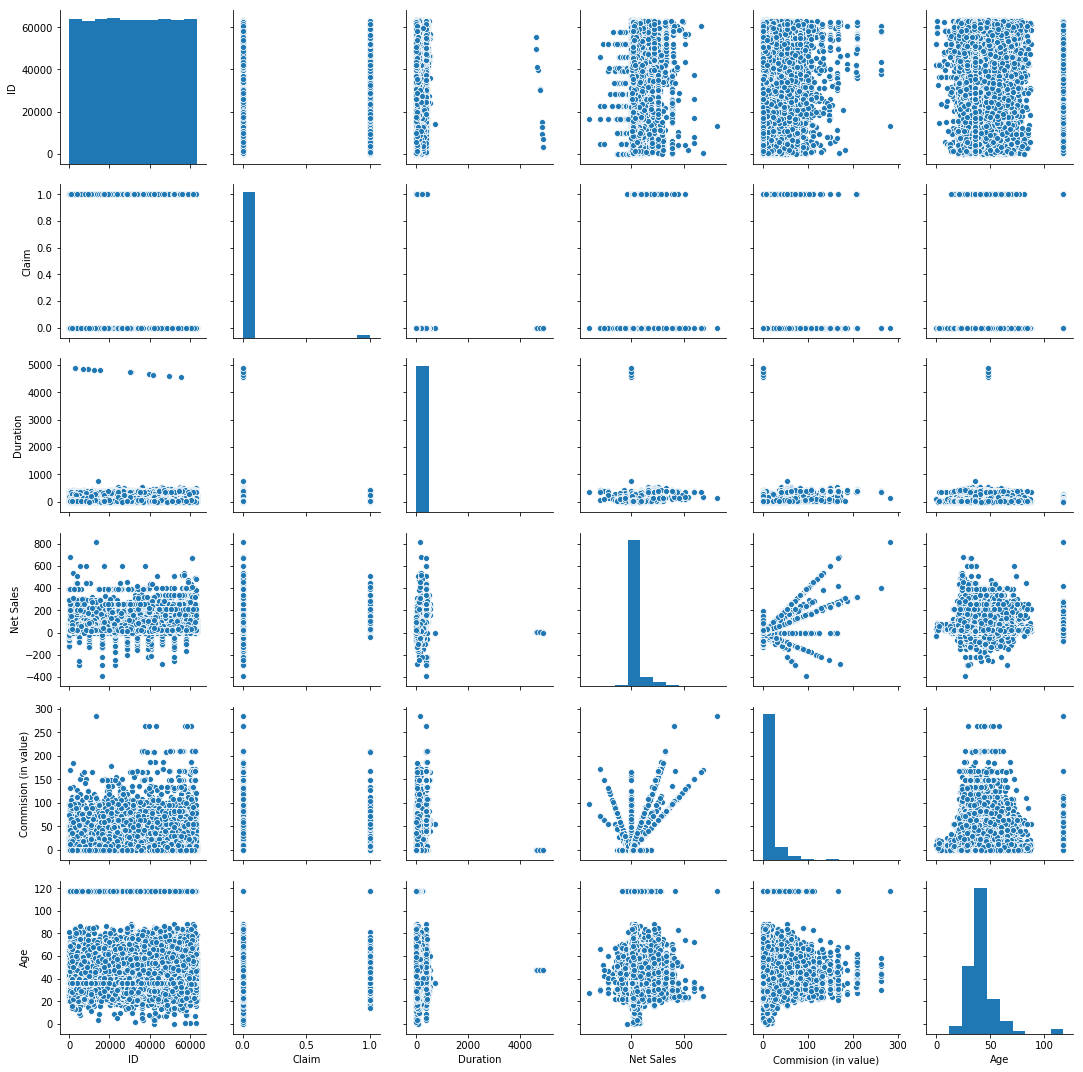

In [196]:
sns.pairplot(data)

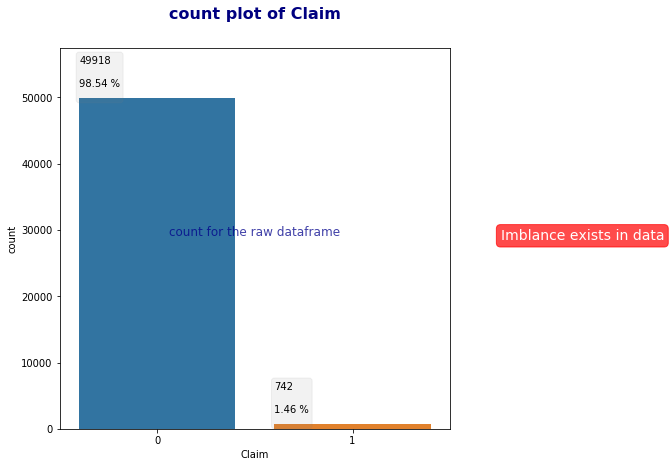

In [263]:
get_class_counts(data, 'Claim', subtitle='count for the raw dataframe')

####### Observation: The data set is highly imbalance it just 1.46% claim settled. Under such circumstances the model always predict every transaction as claim rejected there fore resampling is essential for dataset.

####  Check for missing values

In [264]:
# Function to calculate missing values by column
def missing_values_table(df):
        "Function which will return null values percentage by column"
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [265]:
missing_values_table(data)

Your selected dataframe has 12 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
Gender,36046,71.2


#### As we seen above missing value percentage of column gender is more than 50% so, ite does not give us any valueable information baout dataset so we will delete this feature later

###  Data Preprocessing
1. Treat duration less than zero
2. Remove ID column as it is unique
3. Remove Gender Coulmn as contains around 71% NaN values
4. Treat Net Sale less than 0

In [266]:
region = pd.read_csv("C:\\Users\\user\\Hackathon\\data\\Destination_Country_Mapping_updated.csv")
region.head()

,Destination,Global,Region
0,ANGOLA,Global South,Africa
1,ARGENTINA,Global South,South/Latin America
2,AUSTRALIA,Global North,Asia & Pacific
3,AUSTRIA,Global North,Europe
4,AZERBAIJAN,Global South,Asia & Pacific


In [267]:
data_full.head()

,Age,Agency,Agency Type,Claim,Commision (in value),Destination,Distribution Channel,Duration,Gender,ID,Net Sales,Product Name
0,31,CWT,Travel Agency,0.0,17.82,MALAYSIA,Online,7,NaN,3433,0.0,Rental Vehicle Excess Insurance
1,36,EPX,Travel Agency,0.0,0.00,SINGAPORE,Online,85,NaN,4339,69.0,Cancellation Plan
2,75,CWT,Travel Agency,0.0,11.88,MALAYSIA,Online,11,NaN,34590,19.8,Rental Vehicle Excess Insurance
3,32,EPX,Travel Agency,0.0,0.00,INDONESIA,Online,16,NaN,55816,20.0,2 way Comprehensive Plan
4,29,EPX,Travel Agency,0.0,0.00,"KOREA, REPUBLIC OF",Online,10,NaN,13816,15.0,Cancellation Plan


In [268]:
data_full = data_full.merge(region, left_on='Destination', right_on='Destination', how='left')
data_full.head()

,Age,Agency,Agency Type,Claim,Commision (in value),Destination,Distribution Channel,Duration,Gender,ID,Net Sales,Product Name,Global,Region
0,31,CWT,Travel Agency,0.0,17.82,MALAYSIA,Online,7,NaN,3433,0.0,Rental Vehicle Excess Insurance,Global South,Asia & Pacific
1,36,EPX,Travel Agency,0.0,0.00,SINGAPORE,Online,85,NaN,4339,69.0,Cancellation Plan,Global North,Asia & Pacific
2,75,CWT,Travel Agency,0.0,11.88,MALAYSIA,Online,11,NaN,34590,19.8,Rental Vehicle Excess Insurance,Global South,Asia & Pacific
3,32,EPX,Travel Agency,0.0,0.00,INDONESIA,Online,16,NaN,55816,20.0,2 way Comprehensive Plan,Global South,Asia & Pacific
4,29,EPX,Travel Agency,0.0,0.00,"KOREA, REPUBLIC OF",Online,10,NaN,13816,15.0,Cancellation Plan,Global North,Asia & Pacific


In [203]:
data_full.isnull().sum()

Age                         0
Agency                      0
Agency Type                 0
Claim                   12666
Commision (in value)        0
Destination                 0
Distribution Channel        0
Duration                    0
Gender                  45107
ID                          0
Net Sales                   0
Product Name                0
Global                   1210
Region                      0
dtype: int64

In [269]:
data_full.drop(columns=['Destination', 'Global'], inplace=True)

In [270]:
data_full['Gender']=data_full['Gender'].fillna('Unknown')
data_full['Gender'].value_counts()

Unknown    45107
M           9347
F           8872
Name: Gender, dtype: int64

#### Convert Categorical features to numeric (Agency,Agency Type, Distributiona Channel, Product Name, Destination)

In [271]:
# Label Encoding
le = LabelEncoder()
# Function that auto encodes any dataframe column of type category or object.
def dummyEncode(dataset):
        
        columnsToEncode = list(dataset.select_dtypes(include=['category','object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                dataset[feature] = le.fit_transform(dataset[feature])
            except:
                print('Error encoding '+feature)
        return dataset
data_full = dummyEncode(data_full)

In [272]:
data_full.head()

,Age,Agency,Agency Type,Claim,Commision (in value),Distribution Channel,Duration,Gender,ID,Net Sales,Product Name,Region
0,31,6,1,0.0,17.82,1,7,2,3433,0.0,16,2
1,36,7,1,0.0,0.00,1,85,2,4339,69.0,10,2
2,75,6,1,0.0,11.88,1,11,2,34590,19.8,16,2
3,32,7,1,0.0,0.00,1,16,2,55816,20.0,1,2
4,29,7,1,0.0,0.00,1,10,2,13816,15.0,10,2


In [273]:
data_full.shape

(63326, 12)

In [274]:
# One-hot encoding
dummified_df = pd.get_dummies(data_full,columns=['Agency','Agency Type','Distribution Channel',
                                                        'Product Name','Region','Gender'],
                             drop_first= True)
dummified_df.shape

(63326, 55)

In [275]:
# Separate values of test and train on claim
data_train_final = dummified_df.iloc[:50660,:] 
data_test_final = dummified_df.iloc[50660:,:]

print(data_train_final.shape)
print(data_test_final.shape)

(50660, 55)
(12666, 55)


In [276]:
data_test_final.drop('Claim',axis=1,inplace=True)
data_test_final.shape

(12666, 54)

#### Running base model

In [277]:
X=data_train_final.drop(['Claim', 'ID'],axis=1)
y=data_train_final['Claim']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=7)


In [278]:
X.head()

,Age,Commision (in value),Duration,Net Sales,Agency_1,Agency_2,Agency_3,Agency_4,Agency_5,Agency_6,...,Product Name_23,Product Name_24,Product Name_25,Region_1,Region_2,Region_3,Region_4,Region_5,Gender_1,Gender_2
0,31,17.82,7,0.0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
1,36,0.00,85,69.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,75,11.88,11,19.8,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
3,32,0.00,16,20.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,29,0.00,10,15.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [212]:
from sklearn.model_selection import train_test_split
def grid_search_random_forrest(dataframe,target):
    X = dataframe
    y = target

    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)
    rfc = RandomForestClassifier()
    param_grid = { 
    #'n_estimators': [5,6,7,8,9,10,11],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
    }
    grid_search_model = GridSearchCV(rfc, param_grid=param_grid)
    grid_search_model.fit(X_train, y_train)
    
    return grid_search_model.best_params_

print('Best Parameters are:')

grid_search_random_forrest(X,y)

Best Parameters are:


{'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto'}

[[12962  2087]
 [ 3524 11378]]
ROC_AUC_SCORE is 0.812420681979421
              precision    recall  f1-score   support

         0.0       0.79      0.86      0.82     15049
         1.0       0.85      0.76      0.80     14902

   micro avg       0.81      0.81      0.81     29951
   macro avg       0.82      0.81      0.81     29951
weighted avg       0.82      0.81      0.81     29951



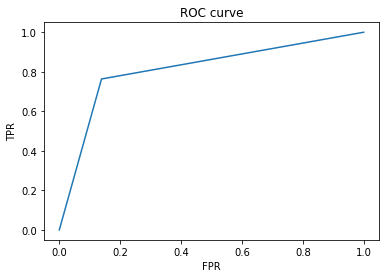

In [279]:
####### SMOTE

from sklearn.metrics import roc_auc_score,roc_curve,classification_report
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix


def grid_search_random_forrest_best(dataframe,target):
    X = dataframe
    y = target
    
    # Applying Smote for dealing with class imbalance
    smote = SMOTE(kind='regular')
    X_sm, y_sm =  smote.fit_sample(X, y)
    
    X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=42)
    
    rfc = RandomForestClassifier(n_estimators=7, max_features='auto', max_depth=4, criterion='gini')
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    
    y_test_final = data_test_final.copy()
    y_pred_test = rfc.predict(y_test_final.drop('ID', axis=1))
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    print(confusion_matrix(y_test, y_pred))
    print('ROC_AUC_SCORE is',roc_auc_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    #fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    plt.clf()
    plt.plot(false_positive_rate, true_positive_rate)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()
    return y_pred_test

# Applying the best paramaters on the best features obtained using RFE
y_pred_test = grid_search_random_forrest_best(X,y)

In [280]:
# Now on Test
out_df = pd.DataFrame({'Claim':y_pred_test})
out_df['ID'] = data_test['ID']
out_df['Claim'] = out_df['Claim'].map(lambda x: int(x))
out_df = out_df[['ID','Claim']]
out_df.head(1)

,ID,Claim
0,25902,0


In [281]:
out_df['Claim'].value_counts()

0    10791
1     1875
Name: Claim, dtype: int64

In [136]:
out_df.to_csv("C:\\Users\\user\\Hackathon\\data\\result.csv", index=False)

### Do some data pre processing

In [282]:
data_train_final.shape

(50660, 55)

In [283]:
data_train_final=data_train_final.drop(data1[data1['Duration'] < 0].index)
data_train_final.shape

(50657, 55)

In [284]:
data_train_final=data_train_final.drop(data1[data1['Net Sales'] < 0].index)
data_train_final.shape

(50128, 55)

In [220]:
data_train_final.loc[data_train_final['Age'] == 118].head()


,Age,Claim,Commision (in value),Duration,ID,Net Sales,Agency_1,Agency_2,Agency_3,Agency_4,...,Product Name_23,Product Name_24,Product Name_25,Region_1,Region_2,Region_3,Region_4,Region_5,Gender_1,Gender_2
90,118,0.0,31.2,58,41201,78.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
108,118,0.0,12.4,15,31332,31.0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
140,118,0.0,15.6,8,40733,39.0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
153,118,0.0,31.2,4,5275,78.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
181,118,0.0,12.4,0,46888,31.0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0


In [285]:
X=data_train_final.drop(['Claim','ID'],axis=1)
y=data_train_final['Claim']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=7)


In [286]:
X.head()

,Age,Commision (in value),Duration,Net Sales,Agency_1,Agency_2,Agency_3,Agency_4,Agency_5,Agency_6,...,Product Name_23,Product Name_24,Product Name_25,Region_1,Region_2,Region_3,Region_4,Region_5,Gender_1,Gender_2
0,31,17.82,7,0.0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
1,36,0.00,85,69.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,75,11.88,11,19.8,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
3,32,0.00,16,20.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,29,0.00,10,15.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


[[12523  2361]
 [ 2734 12016]]
ROC_AUC_SCORE is 0.8280086772737417
              precision    recall  f1-score   support

         0.0       0.82      0.84      0.83     14884
         1.0       0.84      0.81      0.83     14750

   micro avg       0.83      0.83      0.83     29634
   macro avg       0.83      0.83      0.83     29634
weighted avg       0.83      0.83      0.83     29634



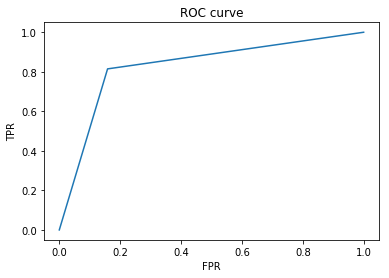

In [287]:
y_pred_test = grid_search_random_forrest_best(X,y)

[[175  45]
 [ 56 168]]
ROC_AUC_SCORE is 0.7727272727272727
              precision    recall  f1-score   support

         0.0       0.76      0.80      0.78       220
         1.0       0.79      0.75      0.77       224

   micro avg       0.77      0.77      0.77       444
   macro avg       0.77      0.77      0.77       444
weighted avg       0.77      0.77      0.77       444



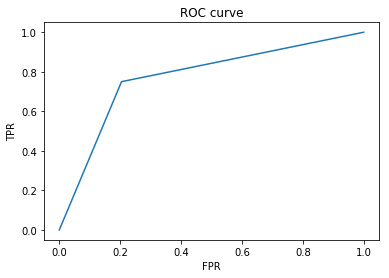

In [288]:
####### Random Under Sampler

from sklearn.metrics import roc_auc_score,roc_curve,classification_report
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix


def random_forest_UnderSampler(dataframe,target):
    X = dataframe
    y = target
    
    from imblearn.under_sampling import RandomUnderSampler
    rus = RandomUnderSampler(random_state=42)
    X_rus,y_rus=rus.fit_resample(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.3, random_state=42)
    
    rfc = RandomForestClassifier(n_estimators=7, max_features='auto', max_depth=4, criterion='gini')
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    
    y_test_final = data_test_final.copy()
    y_pred_test = rfc.predict(y_test_final.drop('ID', axis=1))
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    print(confusion_matrix(y_test, y_pred))
    print('ROC_AUC_SCORE is',roc_auc_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    #fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    plt.clf()
    plt.plot(false_positive_rate, true_positive_rate)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()
    return y_pred_test

# Applying the best paramaters on the best features obtained using RFE
y_pred_test = random_forest_UnderSampler(X,y)

In [289]:
# Now on Test
out_df = pd.DataFrame({'Claim':y_pred_test})
out_df['ID'] = data_test['ID']
out_df['Claim'] = out_df['Claim'].map(lambda x: int(x))
out_df = out_df[['ID','Claim']]
print(out_df.head(1))
print('--------')
print(out_df['Claim'].value_counts())

      ID  Claim
0  25902      0
--------
0    9960
1    2706
Name: Claim, dtype: int64


In [230]:
out_df.to_csv("C:\\Users\\user\\Hackathon\\data\\result_RandomUnderSampler.csv", index=False)

[[170  50]
 [ 59 165]]
ROC_AUC_SCORE is 0.7546672077922079
              precision    recall  f1-score   support

         0.0       0.74      0.77      0.76       220
         1.0       0.77      0.74      0.75       224

   micro avg       0.75      0.75      0.75       444
   macro avg       0.75      0.75      0.75       444
weighted avg       0.76      0.75      0.75       444



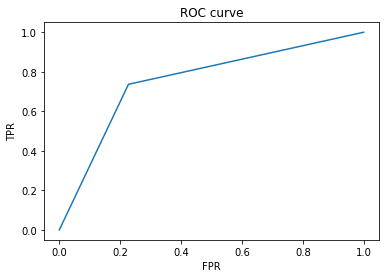

In [290]:
####### Random Under Sampler with Leaner SVC

from sklearn.metrics import roc_auc_score,roc_curve,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC

def linear_SVC_UnderSampler(dataframe,target):
    X = dataframe
    y = target
    
    from imblearn.under_sampling import RandomUnderSampler
    rus = RandomUnderSampler(random_state=42)
    X_rus,y_rus=rus.fit_resample(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.3, random_state=42)
    
    rfc = LinearSVC(random_state=0, tol=1e-5)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    
    y_test_final = data_test_final.copy()
    y_pred_test = rfc.predict(y_test_final.drop('ID', axis=1))
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    print(confusion_matrix(y_test, y_pred))
    print('ROC_AUC_SCORE is',roc_auc_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    #fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    plt.clf()
    plt.plot(false_positive_rate, true_positive_rate)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()
    return y_pred_test

# Applying the best paramaters on the best features obtained using RFE
y_pred_test = linear_SVC_UnderSampler(X,y)

In [291]:
# Now on Test
out_df = pd.DataFrame({'Claim':y_pred_test})
out_df['ID'] = data_test['ID']
out_df['Claim'] = out_df['Claim'].map(lambda x: int(x))
out_df = out_df[['ID','Claim']]
print(out_df.head(1))
print('--------')
print(out_df['Claim'].value_counts())

      ID  Claim
0  25902      0
--------
0    9936
1    2730
Name: Claim, dtype: int64


In [233]:
out_df.to_csv("C:\\Users\\user\\Hackathon\\data\\result_RandomUnderSampler_linearSVC.csv", index=False)

[[207  13]
 [123 101]]
ROC_AUC_SCORE is 0.6959009740259741
              precision    recall  f1-score   support

         0.0       0.63      0.94      0.75       220
         1.0       0.89      0.45      0.60       224

   micro avg       0.69      0.69      0.69       444
   macro avg       0.76      0.70      0.68       444
weighted avg       0.76      0.69      0.67       444



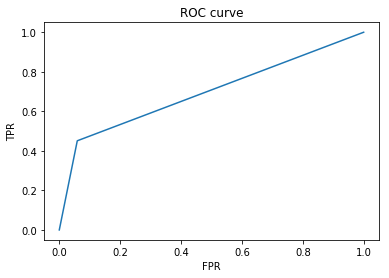

In [294]:
####### Random Under Sampler with Naive Bayes

from sklearn.metrics import roc_auc_score,roc_curve,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

def Naive_Bayes_UnderSampler(dataframe,target):
    X = dataframe
    y = target
    
    from imblearn.under_sampling import RandomUnderSampler
    rus = RandomUnderSampler(random_state=42)
    X_rus,y_rus=rus.fit_resample(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.3, random_state=42)
    
    rfc = GaussianNB()
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    
    y_test_final = data_test_final.copy()
    y_pred_test = rfc.predict(y_test_final.drop('ID', axis=1))
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    print(confusion_matrix(y_test, y_pred))
    print('ROC_AUC_SCORE is',roc_auc_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    #fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    plt.clf()
    plt.plot(false_positive_rate, true_positive_rate)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()
    return y_pred_test

# Applying the best paramaters on the best features obtained using RFE
y_pred_test = Naive_Bayes_UnderSampler(X,y)

In [295]:
# Now on Test
out_df = pd.DataFrame({'Claim':y_pred_test})
out_df['ID'] = data_test['ID']
out_df['Claim'] = out_df['Claim'].map(lambda x: int(x))
out_df = out_df[['ID','Claim']]
print(out_df.head(1))
print('--------')
print(out_df['Claim'].value_counts())

      ID  Claim
0  25902      0
--------
0    11564
1     1102
Name: Claim, dtype: int64


In [296]:
out_df.to_csv("C:\\Users\\user\\Hackathon\\data\\result_RandomUnderSampler_naiveBayes.csv", index=False)

In [325]:
data_train_final_gender=data_train_final.drop(['Gender_1','Gender_2'],axis=1)
data_train_final_gender.head()


,Age,Claim,Commision (in value),Duration,ID,Net Sales,Agency_1,Agency_2,Agency_3,Agency_4,...,Product Name_21,Product Name_22,Product Name_23,Product Name_24,Product Name_25,Region_1,Region_2,Region_3,Region_4,Region_5
0,31,0.0,17.82,7,3433,0.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,36,0.0,0.00,85,4339,69.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,75,0.0,11.88,11,34590,19.8,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,32,0.0,0.00,16,55816,20.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,29,0.0,0.00,10,13816,15.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [326]:
data_test_final_gender=data_test_final.drop(['Gender_1','Gender_2'],axis=1)
data_test_final_gender.head()

,Age,Commision (in value),Duration,ID,Net Sales,Agency_1,Agency_2,Agency_3,Agency_4,Agency_5,...,Product Name_21,Product Name_22,Product Name_23,Product Name_24,Product Name_25,Region_1,Region_2,Region_3,Region_4,Region_5
50660,47,29.7,58,25902,49.5,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
50661,24,0.0,4,19535,20.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
50662,36,0.0,68,43717,20.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
50663,36,0.0,41,48271,28.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
50664,36,0.0,16,52318,11.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [328]:
X=data_train_final_gender.drop(['Claim','ID'],axis=1)
y=data_train_final_gender['Claim']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=7)


[[ 65 155]
 [  8 216]]
ROC_AUC_SCORE is 0.6298701298701299
              precision    recall  f1-score   support

         0.0       0.89      0.30      0.44       220
         1.0       0.58      0.96      0.73       224

   micro avg       0.63      0.63      0.63       444
   macro avg       0.74      0.63      0.58       444
weighted avg       0.73      0.63      0.59       444



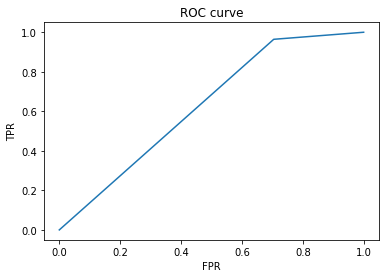

In [329]:
####### Random Under Sampler with Leaner SVC

from sklearn.metrics import roc_auc_score,roc_curve,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC

def linear_SVC_UnderSampler_gender(dataframe,target):
    X = dataframe
    y = target
    
    from imblearn.under_sampling import RandomUnderSampler
    rus = RandomUnderSampler(random_state=42)
    X_rus,y_rus=rus.fit_resample(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.3, random_state=42)
    
    rfc = LinearSVC(random_state=0, tol=1e-5)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    
    y_test_final = data_test_final_gender.copy()
    y_pred_test = rfc.predict(y_test_final.drop('ID', axis=1))
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    print(confusion_matrix(y_test, y_pred))
    print('ROC_AUC_SCORE is',roc_auc_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    #fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    plt.clf()
    plt.plot(false_positive_rate, true_positive_rate)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()
    return y_pred_test

# Applying the best paramaters on the best features obtained using RFE
y_pred_test = linear_SVC_UnderSampler_gender(X,y)

In [330]:
# Now on Test
out_df = pd.DataFrame({'Claim':y_pred_test})
out_df['ID'] = data_test['ID']
out_df['Claim'] = out_df['Claim'].map(lambda x: int(x))
out_df = out_df[['ID','Claim']]
print(out_df.head(1))
print('--------')
print(out_df['Claim'].value_counts())

      ID  Claim
0  25902      1
--------
1    8727
0    3939
Name: Claim, dtype: int64


In [331]:
out_df.to_csv("C:\\Users\\user\\Hackathon\\data\\result_RandomUnderSampler_Gender.csv", index=False)